<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Overall State of Health and Wellbeing among New Jersey Counties   

Specifically, My research is aimed at helping visitors and travellers to conviniently make critical decisions like choosing the most appropriate county to reside in based on their objectives and critical factors like health, security, life expectancy, transportation, drug and substance use, education, employment opportunities and housing costs.

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

nj_counties.zip  sample_data


<Axes: >

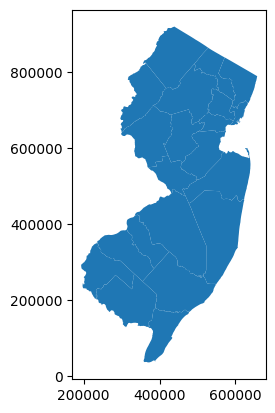

In [ ]:
! wget -q -O nj_counties.zip https://github.com/Brian13Noble/GIS/raw/main/County_Boundaries_of_N.zip
!ls
zip_ref = zipfile.ZipFile('/content/nj_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_counties=gpd.read_file('/content/County_Boundaries_of_NJ.shp') #load the shapefile with gpd as nj_counties

#Make the map
nj_counties.plot()

In [ ]:
file_path = '/content/Additional Measure Data.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
    !wget -q https://github.com/Brian13Noble/GIS/raw/main/Additional%20Measure%20Data.xlsx

# Now read the Excel file into a DataFrame
add_measures = pd.read_excel(file_path, skiprows=1)

In [ ]:
drop_columns = ['Life Expectancy (AIAN)', 'Life Expectancy (AIAN) 95% CI - Low', 'Life Expectancy (AIAN) 95% CI - High']
add_measures = add_measures.drop(columns = drop_columns)

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
add_measures.drop(0, inplace=True)

In [ ]:
add_measures= add_measures[['County','Life Expectancy','Life Expectancy (Asian)',
'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 'Life Expectancy (White)', '# Deaths']]
add_measures= add_measures.iloc[0:,:]
add_measures['County'] = add_measures['County'].str.upper()
add_measures

,County,Life Expectancy,Life Expectancy (Asian),Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths
1,ATLANTIC,76.7,89.6,71.4,80.9,76.6,4148
2,BERGEN,82.1,89.6,78.7,84.9,81.2,7666
3,BURLINGTON,79.1,87.3,76.8,84.3,79.0,5362
4,CAMDEN,76.7,89.5,72.2,79.3,77.2,7316
5,CAPE MAY,76.9,NaN,72.2,88.5,76.9,1656
6,CUMBERLAND,74.6,81.8,71.5,77.2,74.6,2549
7,ESSEX,78.0,89.1,73.5,81.8,81.3,10371
8,GLOUCESTER,77.2,88.1,74.0,84.4,77.1,3900
9,HUDSON,80.5,88.5,73.9,82.9,78.5,6617
10,HUNTERDON,83.2,84.8,89.2,84.9,83.1,1102


In [ ]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=add_measures,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

In [ ]:
nj_counties[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


In [ ]:
! wget -q -O nj_hosp.zip https://github.com/Brian13Noble/GIS/raw/main/Hospitals_in_NJ.zip
!ls
zip_ref = zipfile.ZipFile('/content/nj_hosp.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_hosp=gpd.read_file('/content/Hospitals_in_NJ.shp') #load the shapefile with gpd


'Additional Measure Data.xlsx'	 County_Boundaries_of_NJ.shp   nj_hosp.zip
 County_Boundaries_of_NJ.cpg	 County_Boundaries_of_NJ.shx   sample_data
 County_Boundaries_of_NJ.dbf	 County_Boundaries_of_NJ.xml
 County_Boundaries_of_NJ.prj	 nj_counties.zip


# **Exploring the Relationship Between Proximity to Health Facilities and Life Expectancy Across New Jersey Counties**

<Axes: >

Text(446845.6710124223, 234718.67854269317, 'ATLANTIC')

Text(608674.9722902415, 775344.9010707563, 'BERGEN')

Text(445032.1629263677, 380367.81326114654, 'BURLINGTON')

Text(362990.6130646281, 353685.88343532046, 'CAMDEN')

Text(407013.1101655159, 114992.2381988394, 'CAPE MAY')

Text(319542.7506195712, 197359.46040190206, 'CUMBERLAND')

Text(562253.4894993025, 711675.2449586024, 'ESSEX')

Text(311865.8974070625, 322476.6418932246, 'GLOUCESTER')

Text(608428.8356156062, 694107.9908810152, 'HUDSON')

Text(377595.22464250773, 631790.897850177, 'HUNTERDON')

Text(435851.76357316674, 528225.6265984694, 'MERCER')

Text(569736.7056196764, 519774.2489392704, 'MONMOUTH')

Text(553566.9451515895, 382793.6503082593, 'OCEAN')

Text(547109.8753648106, 801736.5245332896, 'PASSAIC')

Text(253014.76795156772, 275761.5670788178, 'SALEM')

Text(459788.9851800551, 630164.5125110017, 'SOMERSET')

Text(439531.57573730504, 839964.9957279859, 'SUSSEX')

Text(545391.285890184, 665430.058250928, 'UNION')

Text(354517.27771581686, 737502.1613603798, 'WARREN')

Text(479789.7234040614, 738913.4075898962, 'MORRIS')

Text(516625.77448491874, 584830.6357102803, 'MIDDLESEX')

Text(0.5, 1.0, 'Hospitals in New Jersey by County')

[]

[]

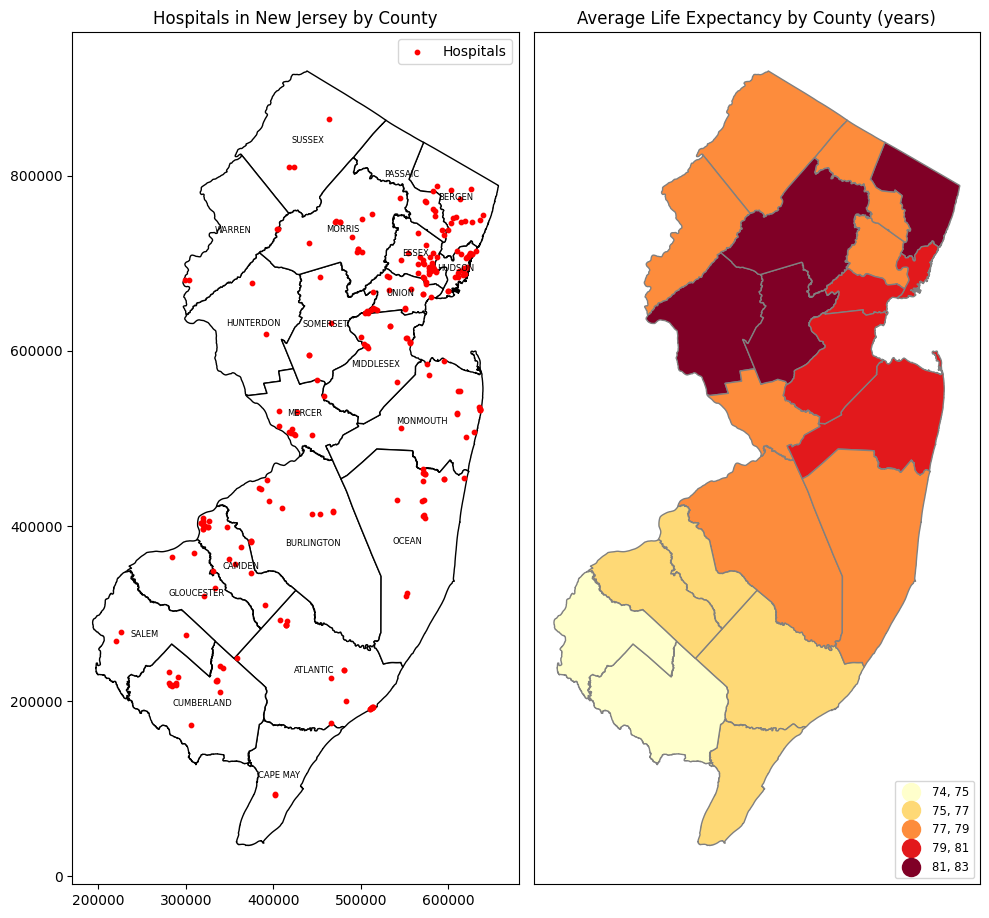

In [ ]:
# Assuming you have a GeoDataFrame for life expectancy named nj_life_expectancy
# Replace 'your_data_here' with your actual data for life expectancy

# Plot New Jersey counties with hospitals
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# First subplot: Hospitals
ax1 = nj_counties.plot(ax=axes[0], color='white', edgecolor='black')
nj_hosp.plot(ax=ax1, color='red', marker='o', markersize=10, label='Hospitals')

for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['COUNTY']):
    ax1.text(x, y, label, fontsize=6, ha='center', va='center')

ax1.set_title('Hospitals in New Jersey by County')
ax1.legend()

# Second subplot: Life Expectancy
ax2 = nj_counties.plot(ax=axes[1], column='Life Expectancy', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
                       edgecolor='grey', linewidth=1,
                       legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
ax2.title.set_text("Average Life Expectancy by County (years)")
ax2.set_xticks([])  # kills xticks
ax2.set_yticks([])  # kills yticks

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



As the maps above indicate, access to healthcare is significantly higher in North Eastern parts of New Jersey, specifically in Counties such as Bergen, Hudson, and Essex. Additionally, from ps3, the counties are among the top 5 most populated counties and also have the highest life expectancies ranging between 79 and 83 years. On the contrary, the access to healthcare is a significant challenge in north-western counties like Sussex, Warren, and Hunterdon and south-jersey counties like Salem, Cumberland, and Cape May. Therefore, access to healthcare services is a critical consideration in NJ as it indicates a strong correlation with life expectancy and overall population growth.
However, there are also interesting observations for counties like Hunterdon, Somerset, and Morris whose citizens have a higher life expectancy despite the map showing few hospitals in the counties.



In [ ]:
!wget -q https://github.com/Brian13Noble/GIS/commits/main/County_Boundaries_of_NJ.geojson

# New Section

In [ ]:
! wget -q -O coll_univ.zip https://github.com/Brian13Noble/GIS/raw/main/Colleges_and_Universities_in_NJ.zip
!ls
zip_ref = zipfile.ZipFile('/content/coll_univ.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
coll_univ=gpd.read_file('/content/Colleges_and_Universities_in_NJ.shp') #load the shapefile with gpd

In [ ]:
# Plot New Jersey counties
ax = nj_counties.plot(color='white', edgecolor='black', figsize=(6, 10))

# Plot college and university points on top of counties
coll_univ.plot(ax=ax, color='red', marker='o', markersize=20, label='Colleges/Universities')

# Annotate county names
for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['COUNTY']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Set plot title and show the plot
plt.title('Colleges and Universities in New Jersey')
plt.legend()  # Add this line to display the legend
plt.show()



Education is one of the key indicators of growth and development of a state.

In [ ]:
import os
import pandas as pd

file_path = '/content/Suspected Drug Related Deaths in NJ.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/Suspected%20Drug%20Related%20Deaths%20in%20NJ.xlsx

# Now read the Excel file into a DataFrame
drug_deaths = pd.read_excel(file_path)



In [ ]:
drug_deaths['County'] = drug_deaths['County'].str.upper()

In [ ]:
drug_deaths

In [ ]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=drug_deaths,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

<Axes: >

[]

[]

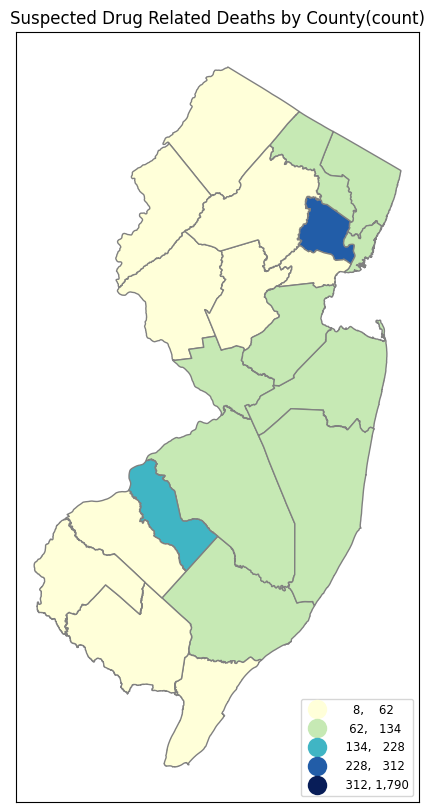

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
nj_counties.plot(ax=ax,column='Deaths(Count)',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Suspected Drug Related Deaths by County(count)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

The map above represents the number of people suspected to have died from drug and substance overdose between 01/01/2023 and 31st August 2023 as reported by the NJ department of  

In [ ]:
import os
import geopandas as gpd

file_path = '/content/Colleges_and_Universities_in_NJ.geojson'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
    !wget -q https://github.com/Brian13Noble/GIS/raw/main/Colleges_and_Universities_in_NJ.geojson

# Now read the GeoJSON file into a GeoDataFrame
coll_univ = gpd.read_file(file_path)


In [ ]:
coll_univ

,OBJECTID,Name,Municipality,County,Parcel,Comments,NAICSDESCR,GNIS,NAICSCODE,MUN_CODE,...,ZIP,ZIP4,FIPS,DEGREE,ENROLLMENT,DOCTORAL,PUBLIC_RESEARCH,Shape_Length,Shape_Area,geometry
0,1,Rutgers - New Burnswick,New Brunswick City,Middlesex,Y,None,UNIVERSITIES,885318,611310,1213,...,08901,1281,34023,DOCTOR'S DEGREE,,Yes,No,36658.9,3431200.7,"MULTIPOLYGON (((-74.45249 40.50583, -74.45364 ..."
1,2,Rutgers - Cook,New Brunswick City,Middlesex,Y,None,UNIVERSITIES,885318,611310,1213,...,08901,1281,34023,DOCTOR'S DEGREE,,Yes,No,80494.8,35270223.1,"MULTIPOLYGON (((-74.44185 40.47652, -74.44192 ..."
2,3,Rutgers - Livingston,Piscataway Twp,Middlesex,Y,None,UNIVERSITIES,882167,611310,1217,...,08854,5602,34023,DOCTOR'S DEGREE,34449,Yes,No,47651.5,40737730.2,"MULTIPOLYGON (((-74.43249 40.51023, -74.43246 ..."
3,4,University of Phoenix - Jersey City,Jersey City,Hudson,Y/N,Mapped parcel where point from nj_colleges_uni...,UNIVERSITIES,885264,611310,0906,...,07310,,34017,BACHELOR'S DEGREE,383,No,No,635.4,17758.9,"POLYGON ((-74.03359 40.72698, -74.03363 40.726..."
4,5,Drew University,Madison Boro,Morris,Y,None,UNIVERSITIES,885287,611310,1417,...,07940,1434,34027,DOCTOR'S DEGREE,2627,No,Yes,18518.8,7453374.5,"MULTIPOLYGON (((-74.43079 40.76357, -74.43153 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,Ocean County College,Toms River Twp,Ocean,Y,None,COLLEGES (EXCEPT JUNIOR COLLEGES),882074,611310,1508,...,08753,,34029,ASSOCIATE'S DEGREE,8449,No,Yes,20270.2,13641127.4,"POLYGON ((-74.17456 40.01361, -74.17397 40.013..."
74,75,Rabbi Jacob Joseph School,Edison Twp,Middlesex,Y,None,THEOLOGICAL SEMINARIES OFFERING BACCALAUREAT O...,882166,611310,1205,...,08817,4476,34023,BACHELOR'S DEGREE,38,No,No,1082.4,61110.3,"POLYGON ((-74.39829 40.50061, -74.39813 40.500..."
75,76,Rabbinical College of America,Morris Twp,Morris,Y,None,THEOLOGICAL SEMINARIES OFFERING BACCALAUREAT O...,882193,611310,1422,...,07960,3632,34027,BACHELOR'S DEGREE,294,No,No,13095.7,3541812.4,"MULTIPOLYGON (((-74.50382 40.81352, -74.50407 ..."
76,77,Seton Hall University Law School - Newark,Newark City,Essex,Y,Mapped parcel where point from nj_colleges_uni...,LAW SCHOOLS,885317,611310,0714,...,07102,5235,34013,MASTER'S DEGREE,,No,No,1226.9,82680.6,"POLYGON ((-74.16626 40.73621, -74.16608 40.736..."


<Axes: >

Text(0.5, 1.0, 'Colleges and Universities')

Text(0.5, 80.7222222222222, 'Longitude')

Text(239.88994868411947, 0.5, 'Latitude')

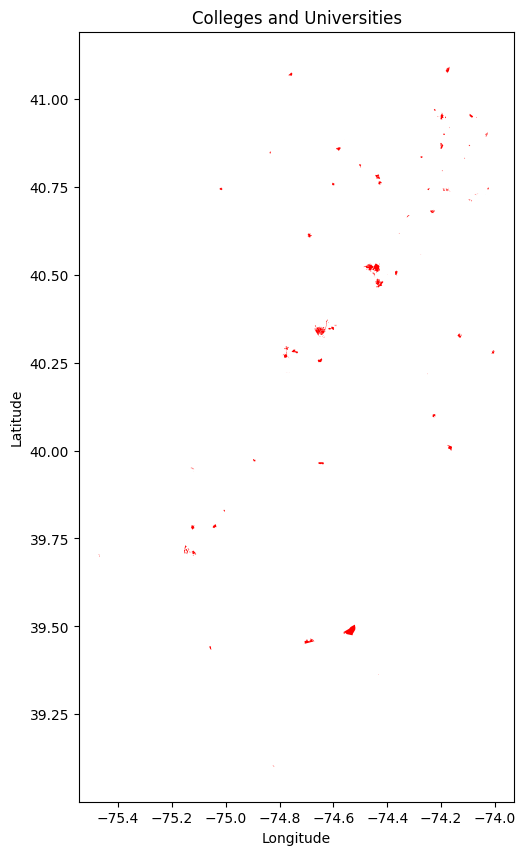

In [ ]:
import matplotlib.pyplot as plt

# Create a map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot universities
coll_univ.plot(ax=ax, marker='o', color='red', markersize=5)

# Add title and labels
ax.set_title('Colleges and Universities')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the map
plt.show()
